## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
adultdata = pd.read_csv('adult.data', header = None, names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace = True)
adultdata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adultdata.shape

(32561, 15)

In [4]:
adultdata.dropna(how='any').shape

(32561, 15)

Пропущенных данных нет.

### Вопрос 1
Сколько мужчин и женщин в выборке?

#### Количество мужчин ('Male'):

In [5]:
len(adultdata[adultdata['sex'] == 'Male'])

21790

##### Ответ: 21 790

#### Количество женщин ('Female'):

In [6]:
len(adultdata[adultdata['sex'] == 'Female'])

10771

##### Ответ: 10 771

### Вопрос 2
Каков средний возраст мужчин?


In [7]:
adultdata['age'][adultdata['sex'] == 'Male'].mean()

39.43354749885268

##### Ответ: 39 лет

### Вопрос 3
Какова доля граждан США?

Примечание: Граждане США - 'United-States'; жители иных территорий США не считаются их гражданами.

In [8]:
len(adultdata[adultdata['native-country'] == 'United-States']) / len(adultdata)*100

89.5857006848684

##### Ответ: 89.58%

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

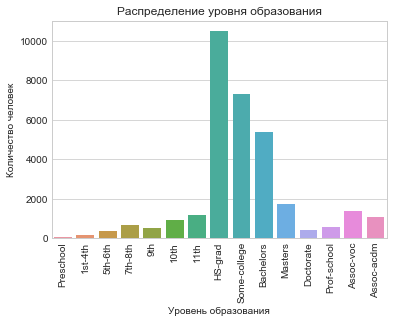

In [9]:
dataforplot = pd.DataFrame({'number': adultdata.groupby('education')['education'].count()}).reindex(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', 'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-voc', 'Assoc-acdm'])
sns.set_style('whitegrid')
plot = sns.barplot(x = dataforplot.index, y = 'number', data = dataforplot).set_xticklabels(labels = dataforplot.index, rotation = 'vertical')
plt.xlabel('Уровень образования')
plt.ylabel('Количество человек')
plt.title('Распределение уровня образования')
plt.show(plot)

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

#### Среднее:

In [10]:
adultdata['fnlwgt'][adultdata['marital-status'] == 'Divorced'].mean()

185802.79045689848

##### Ответ: 185 802,79

#### Стандартное отклонение:

In [11]:
adultdata['fnlwgt'][adultdata['marital-status'] == 'Divorced'].std()

105646.78945933603

##### Ответ: 105 646,79

### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Примечание: Под "высшим образованием" подразумеваются следующие уровни: 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'Masters', 'Prof-school', 'Some-college'.

In [12]:
educ = pd.DataFrame(adultdata[adultdata['50K'] == '>50K'])
educ_higher = pd.DataFrame(educ[(educ['education'] == 'Assoc-acdm') | 
                                (educ['education'] == 'Assoc-voc') | 
                                (educ['education'] == 'Bachelors') | 
                                (educ['education'] == 'Doctorate') | 
                                (educ['education'] == 'Masters') | 
                                (educ['education'] == 'Prof-school') | 
                                (educ['education'] == 'Some-college')])
a = len(educ_higher['education'])
a

5922

In [13]:
b = len(educ['education'])
b

7841

In [14]:
a/b*100

75.52608085703353

##### Ответ: люди с высшим образованием составляют более $\frac{3}{4}$ тех, кто зарабатывает более 50 тыс. долл., следовательно, гипотезу можно признать справедливой

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [15]:
male = pd.DataFrame(adultdata[adultdata['sex'] == 'Male'])
female = pd.DataFrame(adultdata[adultdata['sex'] == 'Female'])

#### Максимальный возраст мужчин:

In [16]:
male.groupby('race')['age'].max()

race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64

#### Максимальный возраст женщин:

In [17]:
female.groupby('race')['age'].max()

race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [18]:
adultdata[adultdata['occupation'] == 'Farming-fishing'].groupby('native-country')['occupation'].count()

native-country
?                  5
Cambodia           1
Canada             2
Cuba               2
El-Salvador        2
England            1
France             1
Germany            1
Guatemala          4
Hong               1
Ireland            1
Italy              2
Japan              1
Mexico            77
Philippines        4
Poland             1
Portugal           1
Puerto-Rico        5
United-States    879
Vietnam            2
Yugoslavia         1
Name: occupation, dtype: int64

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


#### Отношение для мужчин:

In [19]:
maleed = len(adultdata[(adultdata['education'] == 'Bachelors') & (adultdata['sex'] == 'Male')]) / len(adultdata[(adultdata['education'] == 'Masters') & (adultdata['sex'] == 'Male')])
maleed

3.14743049705139

#### Отношение для женщин:

In [20]:
femaleed = len(adultdata[(adultdata['education'] == 'Bachelors') & (adultdata['sex'] == 'Female')]) / len(adultdata[(adultdata['education'] == 'Masters') & (adultdata['sex'] == 'Female')])
femaleed

3.0205223880597014

##### Ответ:

In [21]:
if maleed > femaleed:
    print('Для мужчин')
elif femaleed > maleed:
    print('Для женщин')
else:
    print('Да они одинаковы!')

Для мужчин


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

#### Максимальное количество часов:

In [22]:
adultdata['hours-per-week'].max()

99

##### Ответ: 99

#### Количество людей:¶

In [23]:
len(adultdata[adultdata['hours-per-week'] == adultdata['hours-per-week'].max()])

85

##### Ответ: 85

#### Заработок:

In [24]:
adultdata[adultdata['hours-per-week'] == adultdata['hours-per-week'].max()].groupby('50K')['hours-per-week'].count()

50K
<=50K    60
>50K     25
Name: hours-per-week, dtype: int64

##### Ответ: 60 человек зарабатывают менее или ровно 50 тыс. долл. в год, 25 человек - более 50 тыс. долл. в год